# Abstract

Abstract

Los accidentes cerebro vasculares (ACV o brain stroke en inglès) afectan en el año a màs de 15 millones de personas, entre los afectados, 5 millones lamentablemente pierden la vida y otros 5 millones quedan con secuelas permanentes. En algunas ocasiones se presenta sin antecedentes previos o no està arraigado a ninguna caracterìstica social o geopolìtica, pero sabemos que algunos factores impulsan a que estos sucedan.

Teniendo en cuenta diferentes caracterìsticas tanto socioculturales como mèdicas veremos el riesgo potencial de cada individuo en este trabajo y trataremos de evaluar los riesgos de un posible futuro ACV.

In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
url = 'https://raw.githubusercontent.com/LucasVissani/brain/main/Brain_Stroke.csv'
brain = pd.read_csv(url)
print(brain)

      gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1       Male  80.0             0              1          Yes        Private   
2     Female  49.0             0              0          Yes        Private   
3     Female  79.0             1              0          Yes  Self-employed   
4       Male  81.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
4976    Male  41.0             0              0           No        Private   
4977    Male  40.0             0              0          Yes        Private   
4978  Female  45.0             1              0          Yes       Govt_job   
4979    Male  40.0             0              0          Yes        Private   
4980  Female  80.0             1              0          Yes        Private   

     Residence_type  avg_glucose_level   bmi   smok

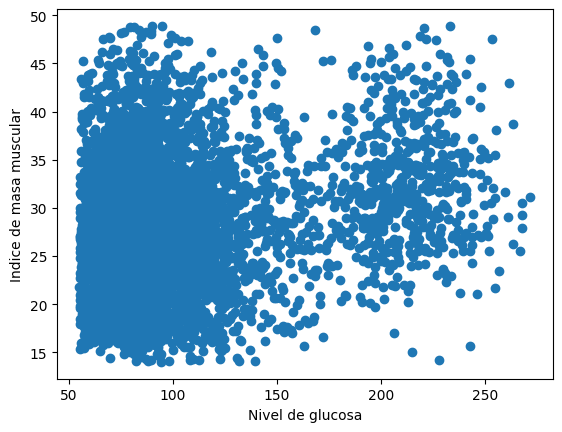

In [5]:
plt.scatter(brain.avg_glucose_level,brain.bmi)
plt.xlabel('Nivel de glucosa')
plt.ylabel('Indice de masa muscular')
plt.show()


Insight = Nivel de glucosa en base al indice de masa muscular

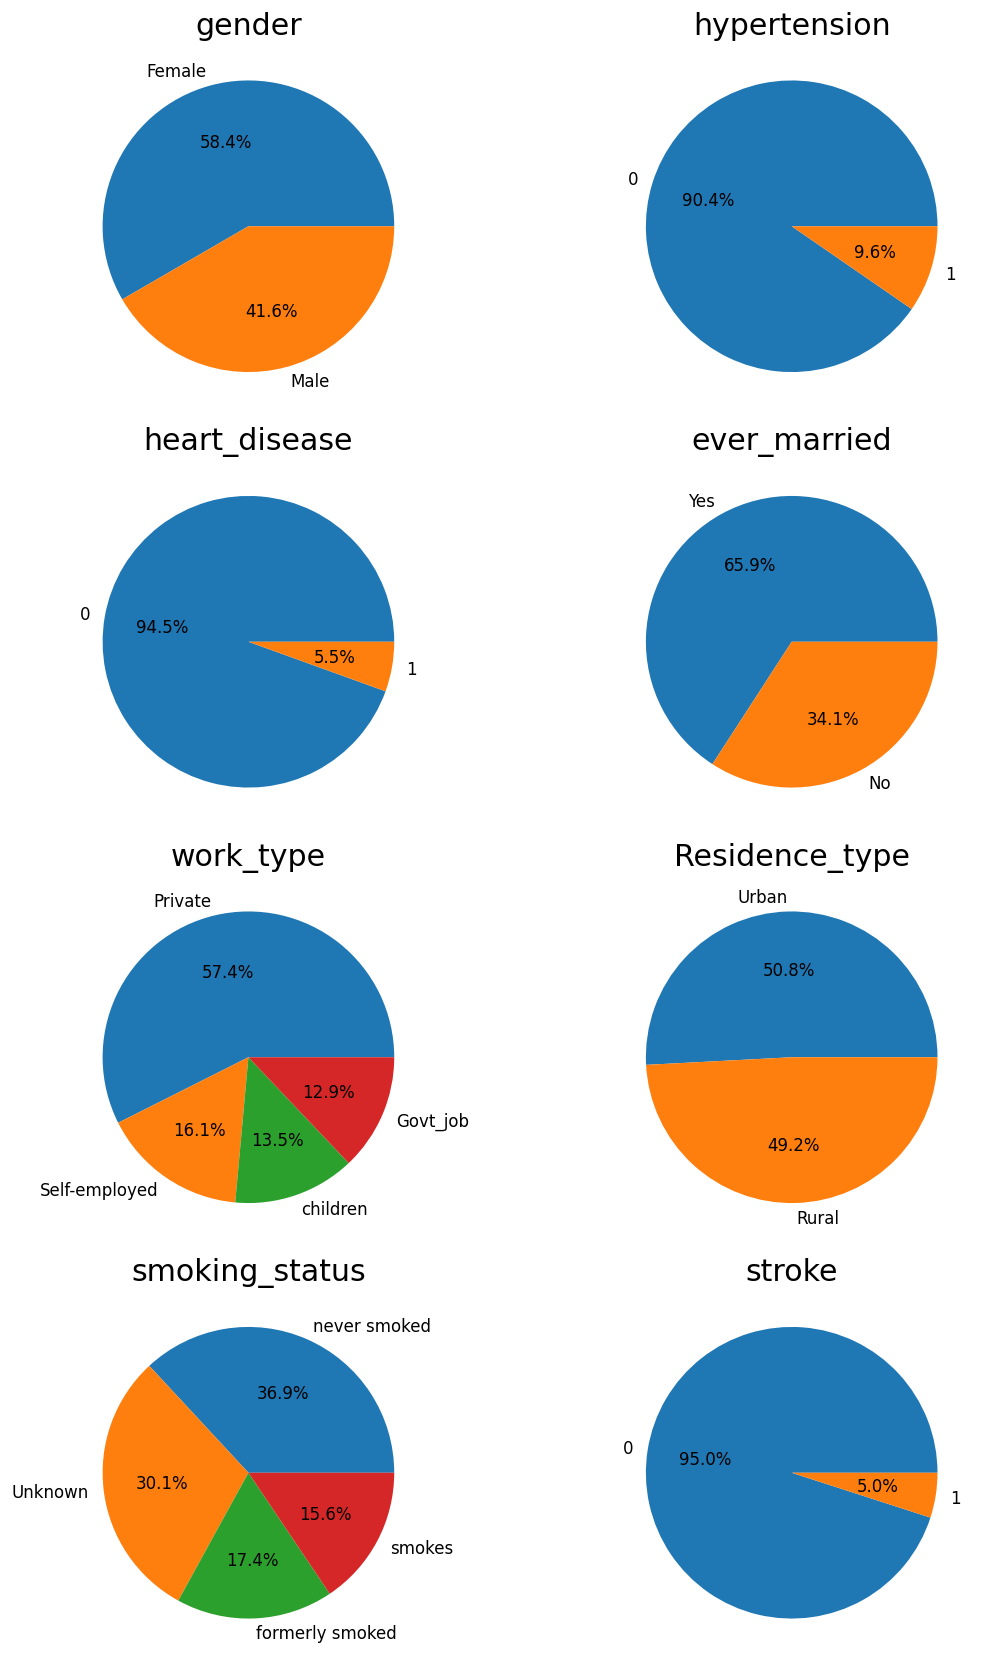

In [6]:
# Creamos una copia de la base de datos eliminando las columnas que no queremos graficas
temp = brain.copy().drop(['age','avg_glucose_level','bmi'],axis=1)

# Hacemos columnas y filas para nuestros graficos, en este caso 4 filas con 2 columnas
fig , axs = plt.subplots(ncols=2, nrows=4, figsize=(10,14), dpi=120)

index = 0
axs = axs.flatten()
dic = {}

# Utiilizamos 2 for para que vaya leyendo nuestra base de datos y extraiga los datos necesarios
# El primero va pasando por las columnas mientras que el segundo extrae los datos

for k,v in temp.items():
  for key,value in brain[k].value_counts().items():
    dic[key] = value
  axs[index].set_title(k , fontsize=18)
  axs[index].pie(list(dic.values()),\
          labels=list(dic.keys()),\
          autopct='%1.1f%%',\
          textprops={'fontsize': 10})
  index += 1
  dic.clear()

# Utilizamos tight_layout para que acomode todos los labels automaticamente
fig.tight_layout()

In [ ]:
print(brain['smoking_status'].unique())

['formerly smoked' 'never smoked' 'smokes' 'Unknown']


Insight = En estos gráficos podremos visualizar porcentualmente diferentes características del grupo de personas a estudiar, como sus antecedentes cardiovasculares, su situaciòn laboral, etc.

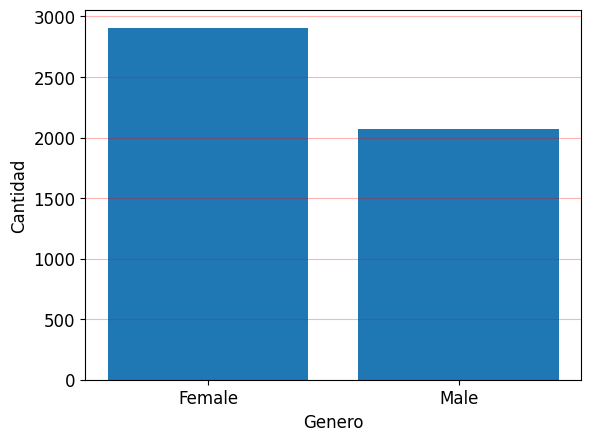

In [ ]:
# Contamos los valores en la columna genero

brain_gender = brain['gender'].value_counts()

# Graficamos esos valores y los diferenciamos en hombre y mujer

plt.bar(brain_gender.index,brain_gender)
plt.ylabel('Cantidad')
plt.xlabel('Genero')
plt.grid(axis='y',alpha=0.3,color='r')
plt.show()

Insight = Podemos visualizar que el grupo a estudiar contiene más personas del género femenino que del género masculino


<Axes: xlabel='age'>

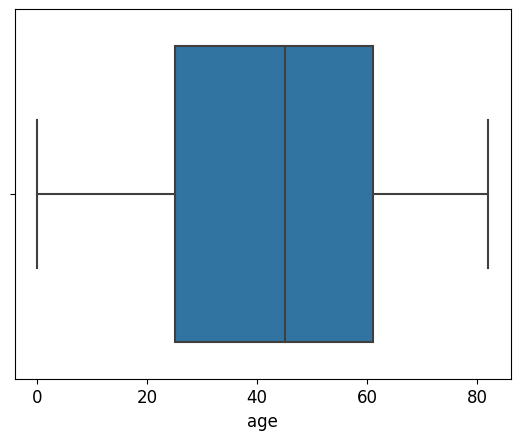

In [ ]:
sns.boxplot(x=brain["age"])

<Axes: xlabel='age', ylabel='Density'>

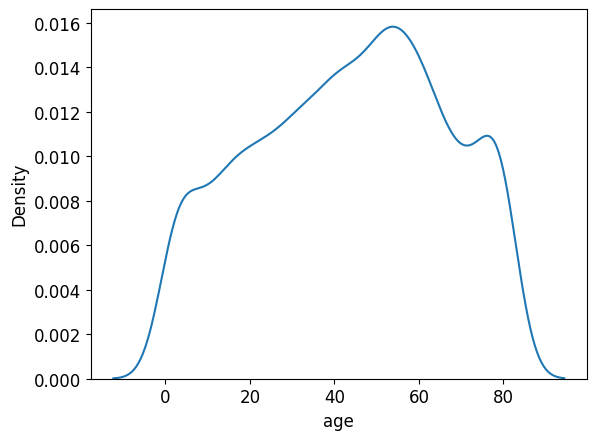

In [ ]:
sns.kdeplot(brain.age)

In [ ]:
media = brain['age'].mean()

print('La media es',media)

La media es 43.41985946597069


Insight = Podemos ver que la media se ubica en 43 años

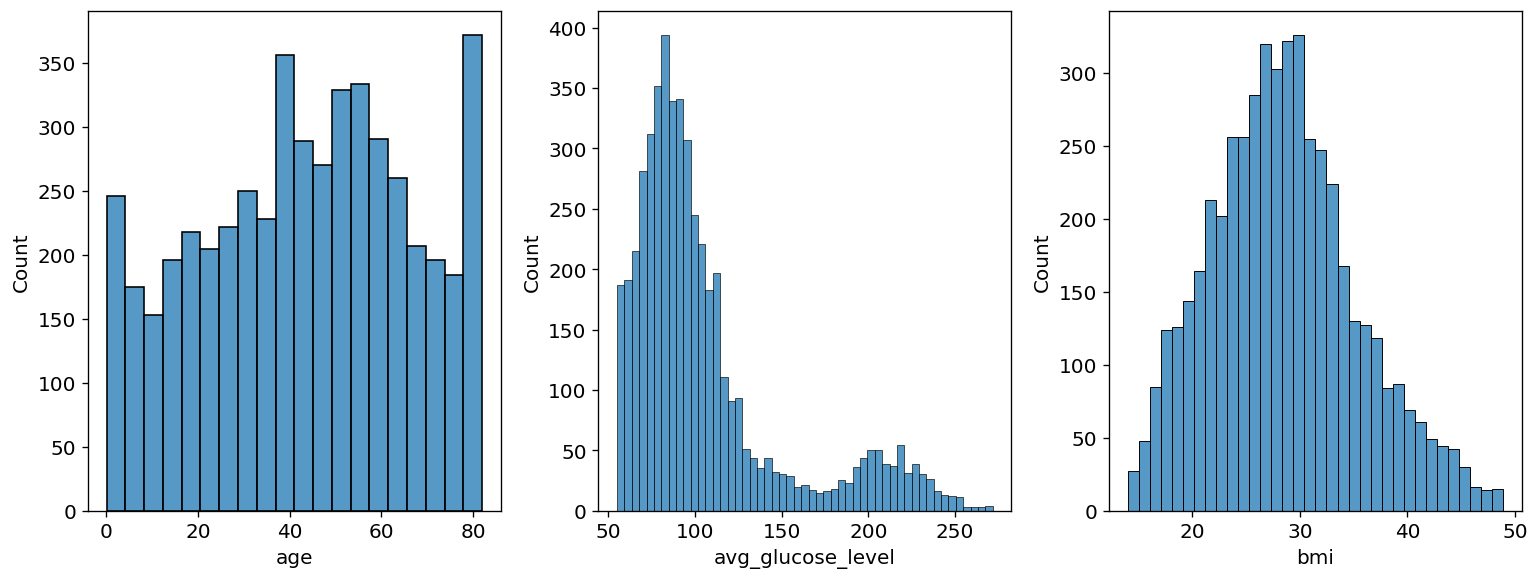

In [ ]:
# Creamos una copia de la base de datos eliminando las columnas que no queremos graficas
temp = pd.concat([brain['age'], brain['avg_glucose_level'],brain['bmi']], axis=1)

# Cambiamos los tamaños del texto
plt.rcParams['font.size'] = '12'

# Hacemos columnas y filas para nuestros graficos, en este caso 1 filas con 3 columnas
fig , axs = plt.subplots(ncols=3, nrows=1, figsize=(13,5), dpi=120)

index = 0
axs = axs.flatten()

# Lo mismo que el anterior, usamos 2 for para explorar la base de datos y extraer los datos

for k,v in temp.items():
  sns.histplot(temp[k] , ax=axs[index])
  index += 1

# Acomodamos los labels con el tight_layout
fig.tight_layout()

Insight = En este gráfico podremos medir cuantitativamente la edad de las personas a estudiar, el nivel de glucosa y su indice de masa corporal(BMI)

In [ ]:
print(min(brain['age']))

print()

print(max(brain['age']))

# Uasmos los min y max para corroborar algunos datos del histograma

0.08

82.0


Insight = Aquí podremos visualizar al amplitud de edad, en el estudio podremos ver tanto neonatos como personas de hasta 82 años

In [ ]:
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
lr = LinearRegression()
import math

In [ ]:
pip install pandas numpy matplotlib scikit-learn

# Regresion Lineal

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Dividir el dataset

x = brain[["age","hypertension","heart_disease","avg_glucose_level","bmi"]]  # Seleccionamos las columnas con las que vamos a entrenar el modelo
y = brain["stroke"]  # Variable objetivo binaria (0 o 1)

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión logística y entrenarlo con los datos de entrenamiento
modelo_regresion_logistica = LogisticRegression()
modelo_regresion_logistica.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = modelo_regresion_logistica.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Exactitud (Accuracy): {accuracy}")
print(f"Precisión (Precision): {precision}")
print(f"Recuperación (Recall): {recall}")
print(f"Puntuación F1 (F1 Score): {f1}")
print("Matriz de confusión:")
print(conf_matrix)

Exactitud (Accuracy): 0.9458375125376128
Precisión (Precision): 0.0
Recuperación (Recall): 0.0
Puntuación F1 (F1 Score): 0.0
Matriz de confusión:
[[943   0]
 [ 54   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Intenamos un metodo de regresion lineal pero claramente no es la mejor opcion asi que probamos un Random Forest y un metodo de regresion Logistica

# Random Forest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Mismas variables
x = brain[["age", "hypertension", "heart_disease", "avg_glucose_level", "bmi"]]
y = brain["stroke"]

# Dividir los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Crear el modelo de Random Forest
model = RandomForestClassifier(random_state=42)

# Entrenar el modelo
model.fit(x_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(x_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9428284854563691
Confusion Matrix:
 [[939   4]
 [ 53   1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       943
           1       0.20      0.02      0.03        54

    accuracy                           0.94       997
   macro avg       0.57      0.51      0.50       997
weighted avg       0.91      0.94      0.92       997



In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Variables
x = brain[["age", "hypertension", "heart_disease", "avg_glucose_level", "bmi"]]
y = brain["stroke"]

# Modelo de Random Forest
model = RandomForestClassifier(random_state=42)

# Validación cruzada
cross_val_scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')

# Resultados de la validación cruzada
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Accuracy:", cross_val_scores.mean())

Cross-Validation Scores: [0.9448345  0.94477912 0.94779116 0.94879518 0.94477912]
Mean Accuracy: 0.9461958163647568


A pesar de el alto numero de Falsos Positivos vemos que si aplicamos una validación cruzada vemos que la media en 5 conjuntos de datos (cv=5) es de un 94%

In [ ]:
# Aplicar el Label Encoding y guardar en una nueva variable dentro de la misma base de datos
brain['smoking_status_encoded'] = LE.fit_transform(brain['smoking_status'])

# # Imprimimos la base de datos para checkear que este todo bien
print(brain)

      gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1       Male  80.0             0              1          Yes        Private   
2     Female  49.0             0              0          Yes        Private   
3     Female  79.0             1              0          Yes  Self-employed   
4       Male  81.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
4976    Male  41.0             0              0           No        Private   
4977    Male  40.0             0              0          Yes        Private   
4978  Female  45.0             1              0          Yes       Govt_job   
4979    Male  40.0             0              0          Yes        Private   
4980  Female  80.0             1              0          Yes        Private   

     Residence_type  avg_glucose_level   bmi   smok

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Mismas variables
x = brain[["age", "hypertension", "heart_disease", "avg_glucose_level", "bmi", "smoking_status_encoded"]]
y = brain["stroke"]

# Dividir los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Crear el modelo de Random Forest
model = RandomForestClassifier(random_state=42)

# Entrenar el modelo
model.fit(x_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(x_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9418254764292878
Confusion Matrix:
 [[938   5]
 [ 53   1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       943
           1       0.17      0.02      0.03        54

    accuracy                           0.94       997
   macro avg       0.56      0.51      0.50       997
weighted avg       0.90      0.94      0.92       997



In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Variables
x = brain[["age", "hypertension", "heart_disease", "avg_glucose_level", "bmi", "smoking_status_encoded"]]
y = brain["stroke"]

# Modelo de Random Forest
model = RandomForestClassifier(random_state=42)

# Validación cruzada
cross_val_scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')

# Resultados de la validación cruzada
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Accuracy:", cross_val_scores.mean())

Cross-Validation Scores: [0.9448345  0.94678715 0.94578313 0.94779116 0.9497992 ]
Mean Accuracy: 0.9469990292161625


Podemos notar que utilizando el Label Encoding para transformar el dato de si el paciente fumaba o no se puede observar una minima mejora en el accuracy del modelo. Agregar este dato al modelo de machine learning no agrega una carga significativa al modelo lo cual nos lleva a pensar que se puede agregar tranquilamente.

# Regresion Logistica

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Mismas variables
x = brain[["age", "hypertension", "heart_disease", "avg_glucose_level", "bmi"]]
y = brain["stroke"]

# Mezclar los datos
combined_data = pd.concat([x, y], axis=1)
combined_data = combined_data.sample(frac=1, random_state=42)  # frac=1 mezcla las filas de manera aleatoria

# Dividir los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(combined_data.drop("stroke", axis=1), combined_data["stroke"], test_size=0.2, random_state=42)

# Modelo de Regresión Logística
model = LogisticRegression(random_state=42)

# Entrenar el modelo
model.fit(x_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = model.predict(x_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9448345035105316
Confusion Matrix:
 [[942   0]
 [ 55   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       942
           1       0.00      0.00      0.00        55

    accuracy                           0.94       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.89      0.94      0.92       997



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Variables
x = brain[["age", "hypertension", "heart_disease", "avg_glucose_level", "bmi"]]
y = brain["stroke"]

# Modelo de Regresión Logística
model = LogisticRegression(random_state=42)

# Validación cruzada
cross_val_scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')

# Resultados de la validación cruzada
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Accuracy:", cross_val_scores.mean())


Cross-Validation Scores: [0.94984955 0.9497992  0.9497992  0.95080321 0.95080321]
Mean Accuracy: 0.9502108735846091


A pesar de el alto numero de Falsos Positivos vemos que si aplicamos una validación cruzada vemos que la media en 5 conjuntos de datos (cv=5) es de un 95%

In [ ]:
# Aplicar el Label Encoding y guardar en una nueva variable dentro de la misma base de datos
brain['smoking_status_encoded'] = LE.fit_transform(brain['smoking_status'])

# Imprimimos la base de datos para checkear que este todo bien
print(brain)


      gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1       Male  80.0             0              1          Yes        Private   
2     Female  49.0             0              0          Yes        Private   
3     Female  79.0             1              0          Yes  Self-employed   
4       Male  81.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
4976    Male  41.0             0              0           No        Private   
4977    Male  40.0             0              0          Yes        Private   
4978  Female  45.0             1              0          Yes       Govt_job   
4979    Male  40.0             0              0          Yes        Private   
4980  Female  80.0             1              0          Yes        Private   

     Residence_type  avg_glucose_level   bmi   smok

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Mismas variables
x = brain[["age", "hypertension", "heart_disease", "avg_glucose_level", "bmi", "smoking_status_encoded"]]
y = brain["stroke"]

# Mezclar los datos
combined_data = pd.concat([x, y], axis=1)
combined_data = combined_data.sample(frac=1, random_state=42)  # frac=1 mezcla las filas de manera aleatoria

# Dividir los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(combined_data.drop("stroke", axis=1), combined_data["stroke"], test_size=0.2, random_state=42)

# Modelo de Regresión Logística
model = LogisticRegression(random_state=42)

# Entrenar el modelo
model.fit(x_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = model.predict(x_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9448345035105316
Confusion Matrix:
 [[942   0]
 [ 55   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       942
           1       0.00      0.00      0.00        55

    accuracy                           0.94       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.89      0.94      0.92       997



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Variables
x = brain[["age", "hypertension", "heart_disease", "avg_glucose_level", "bmi", "smoking_status_encoded"]]
y = brain["stroke"]

# Modelo de Regresión Logística
model = LogisticRegression(random_state=42)

# Validación cruzada
cross_val_scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')

# Resultados de la validación cruzada
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Accuracy:", cross_val_scores.mean())

Cross-Validation Scores: [0.94984955 0.9497992  0.9497992  0.95080321 0.95080321]
Mean Accuracy: 0.9502108735846091


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
